<a href="https://colab.research.google.com/github/KarinaRmzG/Neuronal-Networks/blob/main/ManzanasyNaranjas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(2273, 200, 200, 1)
(441, 200, 200, 1)


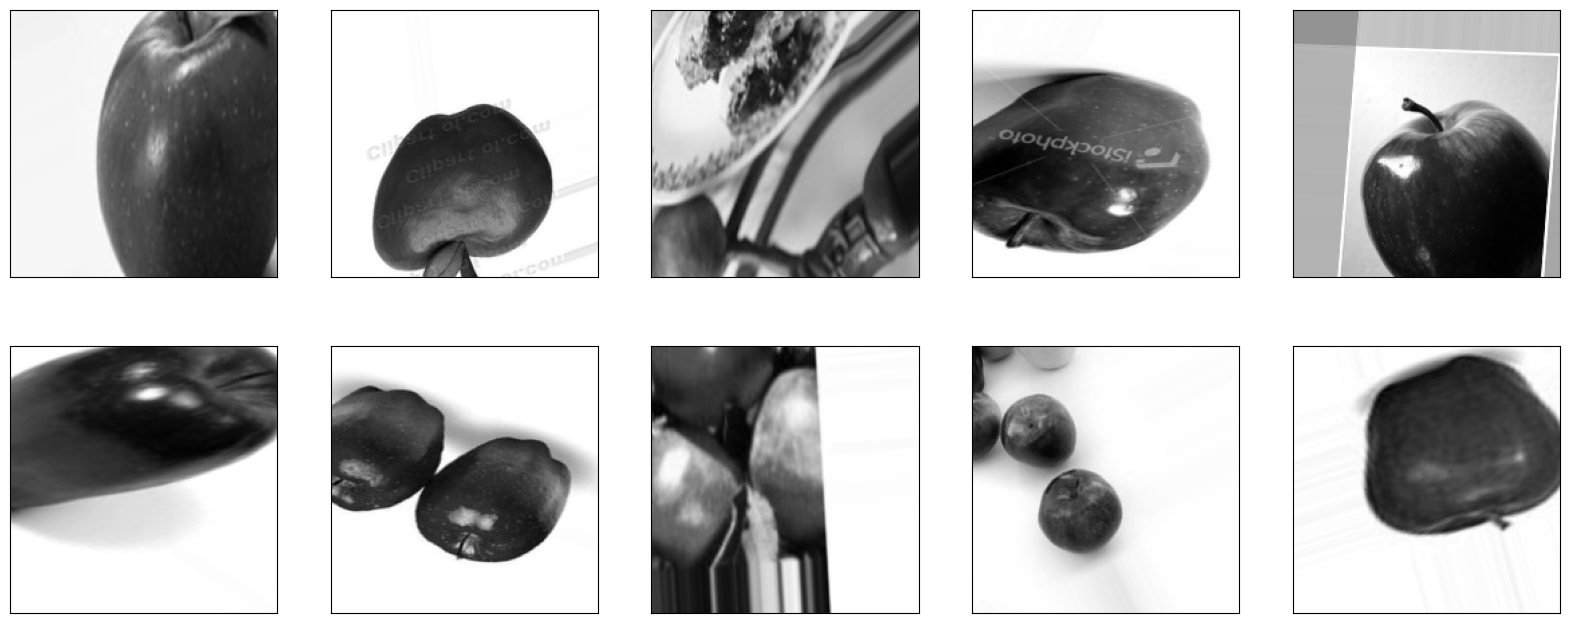

In [1]:
# Importación de bibliotecas
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de datos de entrenamiento y validación
entrenamiento = '/content/drive/MyDrive/Colab Notebooks/Dataset/Entrenamiento'
validacion = '/content/drive/MyDrive/Colab Notebooks/Dataset/Validacion'


# Tamaño de imágenes de entrada (ancho y alto)
ancho, alto = 200, 200

# Listas para almacenar etiquetas y datos de imágenes de entrenamiento y validación
etiquetas = []  # Etiquetas de las imágenes de entrenamiento
fotos = []  # Datos de imágenes de entrenamiento
datos_train = []  # Pares (imagen, etiqueta) de entrenamiento
con = 0

etiquetas2 = []  # Etiquetas de las imágenes de validación
fotos2 = []  # Datos de imágenes de validación
datos_val = []  # Pares (imagen, etiqueta) de validación
con2 = 0

# Carga de imágenes de entrenamiento
for nameDir in os.listdir(entrenamiento):
    nombre = entrenamiento + '/' + nameDir

    for fileName in os.listdir(nombre):
        etiquetas.append(con)
        img = cv2.imread(nombre + '/' + fileName, 0)  # Carga la imagen en escala de grises
        img = cv2.resize(img, (ancho, alto), interpolation=cv2.INTER_CUBIC)  # Redimensiona la imagen
        img = img.reshape(ancho, alto, 1)  # Añade una dimensión para representar canales (escala de grises)
        datos_train.append([img, con])  # Almacena el par (imagen, etiqueta) en datos de entrenamiento
        fotos.append(img)  # Almacena la imagen

    con = con + 1

# Carga de imágenes de validación
for nameDir2 in os.listdir(validacion):
    nombre2 = validacion + '/' + nameDir2

    for fileName2 in os.listdir(nombre2):
        etiquetas2.append(con2)
        img2 = cv2.imread(nombre2 + '/' + fileName2, 0)  # Carga la imagen en escala de grises
        img2 = cv2.resize(img2, (ancho, alto), interpolation=cv2.INTER_CUBIC)  # Redimensiona la imagen
        img2 = img2.reshape(ancho, alto, 1)  # Añade una dimensión para representar canales (escala de grises)
        datos_val.append([img2, con2])  # Almacena el par (imagen, etiqueta) en datos de validación
        fotos2.append(img2)  # Almacena la imagen

    con2 = con2 + 1

# Normalización de las imágenes (escala de grises) al rango [0, 1]
fotos = np.array(fotos).astype(float) / 255
print(fotos.shape)
fotos2 = np.array(fotos2).astype(float) / 255
print(fotos2.shape)

etiquetas = np.array(etiquetas)  # Convierte las etiquetas a un arreglo de NumPy
etiquetas2 = np.array(etiquetas2)  # Convierte las etiquetas de validación a un arreglo de NumPy

# Generación de imágenes de entrenamiento aumentadas
imgTrainGen = ImageDataGenerator(
    rotation_range=50,  # Rango de rotación
    width_shift_range=0.3,  # Rango de desplazamiento horizontal
    height_shift_range=0.3,  # Rango de desplazamiento vertical
    shear_range=15,  # Rango de deformación (shear)
    zoom_range=[0.5, 1.5],  # Rango de zoom
    vertical_flip=True,  # Volteo vertical aleatorio
    horizontal_flip=True  # Volteo horizontal aleatorio
)

# Ajusta el generador de imágenes de entrenamiento en los datos de imágenes de entrenamiento
imgTrainGen.fit(fotos)

# Visualización de imágenes aumentadas (solo la primera iteración)
plt.figure(figsize=(20, 8))
for imagen, etiqueta in imgTrainGen.flow(fotos, etiquetas, batch_size=10, shuffle=False):
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i], cmap='gray')
    plt.show()
    break


In [2]:
# Generación de lotes de imágenes de entrenamiento aumentadas
imgTrain = imgTrainGen.flow(fotos, etiquetas, batch_size=32)


# Creación de un modelo de red neuronal con capas densas
ModeloDenso = tf.keras.models.Sequential([
    # Capa de aplanamiento (Flatten) que toma una entrada de 200x200x1 y la convierte en un vector de 40000 elementos
    tf.keras.layers.Flatten(input_shape=(200, 200, 1)),  # 40000 neuronas en la capa de aplanamiento

    # Capa densa con 150 neuronas y función de activación ReLU
    tf.keras.layers.Dense(150, activation='relu'),

    # Otra capa densa con 150 neuronas y función de activación ReLU
    tf.keras.layers.Dense(150, activation='relu'),

    # Capa de salida con 1 neurona y función de activación sigmoide, utilizada para clasificación binaria
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Creación de un modelo de red neuronal convolucional (CNN)
ModeloCNN = tf.keras.models.Sequential([
    # Capa convolucional con 32 filtros, con un kernel de 3x3, y función de activación ReLU.
    # La capa tiene una entrada de forma 200x200x1 (imagen en escala de grises).
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    # Capa de Max Pooling para reducir el tamaño de la representación espacial.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Capa convolucional con 64 filtros, con un kernel de 3x3, y función de activación ReLU.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Otra capa de Max Pooling para reducir aún más el tamaño.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Capa convolucional con 128 filtros, con un kernel de 3x3, y función de activación ReLU.
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Otra capa de Max Pooling para reducir aún más el tamaño de la representación espacial.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Capas densas para la clasificación
    tf.keras.layers.Flatten(),  # Aplana la salida de la última capa convolucional
    tf.keras.layers.Dense(256, activation='relu'),  # Capa densa con 256 neuronas y ReLU
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona y activación sigmoide
])

#Modelo convolucional con drop out
ModeloCNN2 = tf.keras.models.Sequential([
    # Capa convolucional con 32 filtros, con un kernel de 3x3, y función de activación ReLU.
    # La capa tiene una entrada de forma 200x200x1 (imagen en escala de grises).
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    # Capa de Max Pooling para reducir el tamaño de la representación espacial.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Capa convolucional con 64 filtros, con un kernel de 3x3, y función de activación ReLU.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Otra capa de Max Pooling para reducir aún más el tamaño.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Capa convolucional con 128 filtros, con un kernel de 3x3, y función de activación ReLU.
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Otra capa de Max Pooling para reducir aún más el tamaño de la representación espacial.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Capas densas para la clasificación
    tf.keras.layers.Dropout(0.5), # Capa de dropout para regularización, desactiva aleatoriamente el 50% de las neuronas
    tf.keras.layers.Flatten(),  # Aplana la salida de la última capa convolucional
    tf.keras.layers.Dense(256, activation='relu'),  # Capa densa con 256 neuronas y ReLU
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar modelos. Usar cross-entropy binaria ya que tenemos solo 2 opciones (manzana o naranja)
# Configurar el modelo denso
ModeloDenso.compile(optimizer='adam',  # Optimizador Adam para ajuste de pesos
                    loss='binary_crossentropy',  # Función de pérdida de entropía cruzada binaria
                    metrics=['accuracy'])  # Métrica a seguir durante el entrenamiento: precisión

# Configurar el modelo CNN
ModeloCNN.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Configurar otro modelo CNN (ModeloCNN2)
ModeloCNN2.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Entrenamiento y guardado de modelos

log_dir = '/content/drive/MyDrive/Colab Notebooks/Salida'
# Modelo Denso
"""
BoardDenso = TensorBoard(log_dir)
ModeloDenso.fit(imgTrain, batch_size=32, validation_data=(fotos2, etiquetas2),
                epochs=100, callbacks=[BoardDenso], steps_per_epoch=int(np.ceil(len(fotos) / float(32))),
                validation_steps=int(np.ceil(len(fotos2) / float(32)))
                )

ModeloDenso.save('ClasificadorDenso.h5')  # Guarda el modelo completo en un archivo h5
ModeloDenso.save_weights('pesosDenso.h5')  # Guarda únicamente los pesos del modelo en un archivo h5
print("El modelo Denso ha sido entrenado")
"""
# Modelo CNN
"""
BoardCNN = TensorBoard(log_dir)
ModeloCNN.fit(imgTrain, batch_size=32, validation_data=(fotos2, etiquetas2),
                epochs=100, callbacks=[BoardCNN], steps_per_epoch=int(np.ceil(len(fotos) / float(32))),
                validation_steps=int(np.ceil(len(fotos2) / float(32))
                ))

ModeloCNN.save('ClasificadorCNN.h5')  # Guarda el modelo completo en un archivo h5
ModeloCNN.save_weights('pesosCNN.h5')  # Guarda únicamente los pesos del modelo en un archivo h5
print("El modelo CNN ha sido entrenado")
"""
# Modelo CNN2

BoardCNN2 = TensorBoard(log_dir)
ModeloCNN2.fit(imgTrain, batch_size=32, validation_data=(fotos2, etiquetas2),
                epochs=100, callbacks=[BoardCNN2], steps_per_epoch=int(np.ceil(len(fotos) / float(32))),
                validation_steps=int(np.ceil(len(fotos2) / float(32))
                ))

ModeloCNN2.save('/content/drive/MyDrive/Colab Notebooks/Salida/ClasificadorCNN2.h5')  # Guarda el modelo completo en un archivo h5
ModeloCNN2.save_weights('/content/drive/MyDrive/Colab Notebooks/Salida/pesosCNN2.h5')  # Guarda únicamente los pesos del modelo en un archivo h5
print("El modelo CNN2 ha sido entrenado")

Epoch 1/100
72/72 [==============================] - 26s 164ms/step - loss: 0.7241 - accuracy: 0.5477 - val_loss: 0.7549 - val_accuracy: 0.4649
Epoch 2/100
72/72 [==============================] - 12s 162ms/step - loss: 0.6382 - accuracy: 0.6296 - val_loss: 0.8488 - val_accuracy: 0.3243
Epoch 3/100
72/72 [==============================] - 9s 126ms/step - loss: 0.6241 - accuracy: 0.6568 - val_loss: 0.8953 - val_accuracy: 0.3583
Epoch 4/100
72/72 [==============================] - 10s 144ms/step - loss: 0.6301 - accuracy: 0.6375 - val_loss: 0.8807 - val_accuracy: 0.4172
Epoch 5/100
72/72 [==============================] - 14s 194ms/step - loss: 0.6141 - accuracy: 0.6648 - val_loss: 0.8628 - val_accuracy: 0.2585
Epoch 6/100
72/72 [==============================] - 12s 161ms/step - loss: 0.5892 - accuracy: 0.6841 - val_loss: 1.1362 - val_accuracy: 0.2041
Epoch 7/100
72/72 [==============================] - 9s 128ms/step - loss: 0.5660 - accuracy: 0.7061 - val_loss: 1.0879 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


El modelo CNN2 ha sido entrenado
